In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import scipy.stats as scs

In [2]:
data = pd.read_csv("insurance.csv")
data.shape

(1338, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
summary = data.describe()
summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
def diskewout(data, kolom): #boxplot, histogram, and skewness score in one def function
    skews = data.loc[:, kolom].skew().round(2)
    print("Nilai skewness kolom {} adalah {}".format(kolom, skews))
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(), kolom], ax = ax_box)
    sns.distplot(data.loc[~data.loc[:,kolom].isna(), kolom], ax = ax_hist)
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    return diskewout

Nilai skewness kolom bmi adalah 0.28


<function __main__.diskewout(data, kolom)>

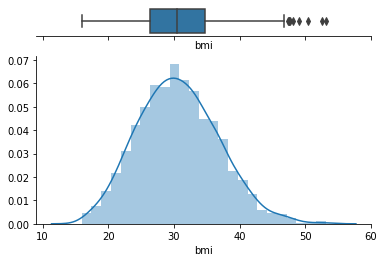

In [6]:
diskewout(data, 'bmi')

Nilai skewness kolom age adalah 0.06


<function __main__.diskewout(data, kolom)>

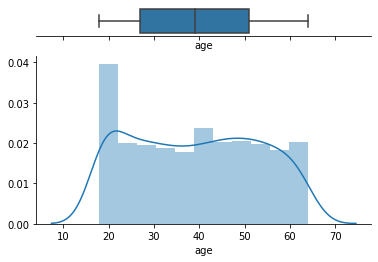

In [7]:
diskewout(data, 'age')

Nilai skewness kolom charges adalah 1.52


<function __main__.diskewout(data, kolom)>

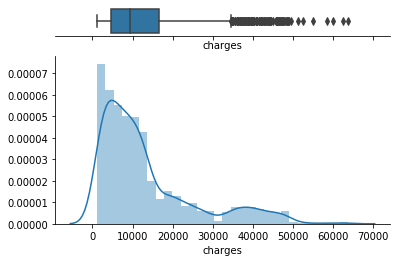

In [8]:
diskewout(data, 'charges')

In [9]:
bmi_kuartil = np.percentile(data["bmi"], [25, 75]) #bmi quartile
age_kuartil = np.percentile(data["age"], [25, 75]) #age quartile
charges_kuartil = np.percentile(data["charges"], [25, 75]) #charges quartile

IQR_bmi = bmi_kuartil[1] - bmi_kuartil[0] #IQR bmi
IQR_age = age_kuartil[1] - age_kuartil[0] #IQR age
IQR_charges = charges_kuartil[1] - charges_kuartil[0] #IQR charges

In [10]:
print("The Minimum and Maximum value of the BMI is "+str(bmi_kuartil[0] - (IQR_bmi*1.5))+" and "+str(bmi_kuartil[1] + (IQR_bmi*1.5))+", so the outliers above 47.29")
print("The Minimum and Maximum value of the Age column is "+str(age_kuartil[0] - (IQR_age*1.5))+" and "+str(age_kuartil[1] + (1.5*IQR_age))+", so the outliers above 87.0")
print("The Minimum and Maximum value of the Charges is "+str(charges_kuartil[0] - (IQR_charges*1.5))+" and "+str(charges_kuartil[1] + (1.5*IQR_charges))+", so the outliers above 34489.4")

The Minimum and Maximum value of the BMI is 13.7 and 47.290000000000006, so the outliers above 47.29
The Minimum and Maximum value of the Age column is -9.0 and 87.0, so the outliers above 87.0
The Minimum and Maximum value of the Charges is -13109.1508975 and 34489.350562499996, so the outliers above 34489.4


In [11]:
Smoker = data[data["smoker"] == 'yes']["charges"]
Tashigi = data[data["smoker"] != 'yes']["charges"]
print("People who smoke is " +str(Smoker.count())+ " person")
print("People who do not smoke is " +str(Tashigi.count())+ " person")

People who smoke is 274 person
People who do not smoke is 1064 person


In [12]:
stat_ttest, pvalue_ttest = scs.ttest_ind(Smoker, Tashigi, equal_var=True)
print("t-statistics = " + str(stat_ttest) + " p_value = " + str(pvalue_ttest))

t-statistics = 46.664921172723716 p_value = 8.271435842177219e-283


In [13]:
if pvalue_ttest <= 0.05:
    print("{} <= 0.05".format(pvalue_ttest))
    print("H0 is rejected and H1 is accepted")
    print("The average of insurance charges of smoket is different than the average of insurance charges of non-smoker")
else:
    print("{} > 0.05".format(pvalue_ttest))
    print("H0 is accepted")
    print("The average of insurance charges of smoker is same as the average of insurance charges of non-smoker")

8.271435842177219e-283 <= 0.05
H0 is rejected and H1 is accepted
The average of insurance charges of smoket is different than the average of insurance charges of non-smoker


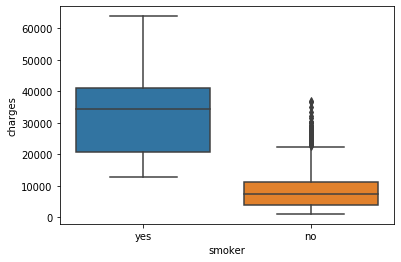

In [14]:
sns.boxplot(x='smoker', y='charges', data=data)